# Основы анализа данных

## Иванов Владимир Сергеевич [373496]

### Цель работы: оценить влияние различных факторов на способность клиентов погасить кредит вовремя

#### План анализа:
1. Предобработка данных
   * загрузка данных
   * очистка данных
   * обогащение данных
3. Исследовательский анализ и визуализация
4. Формирование вывода и рекомендаций

In [182]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

df_original = pd.read_csv('data.csv')
df = pd.read_csv('data.csv')
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Типы данных в порядке.

Зафиксируем размер (количество строк) изначального набора данных.

In [184]:
row_data_shape = df_original.shape[0]

### Шаг 2. Предобработка данных

#### 1.

Методом isna() находим пропущенные значения. Метод sum() выводит количество пропущенных значений для каждого столбца.

In [185]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах days_employed и total_income присутствуют пропущенные значения. По 2174 штуки в каждом.

#### 2.

Найдем все уникальные значения в столбце income_type

In [186]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Для каждого из них посчитаем медианные значения в столбце total_income. Для этого отфильтруем исходный dataframe по значениям income_type и запишем новые для каждого.

In [187]:
filter_empl = df['income_type'] == 'сотрудник'
filter_grand = df['income_type'] == 'пенсионер'
filter_friend = df['income_type'] == 'компаньон'
filter_govern = df['income_type'] == 'госслужащий'
filter_unempl = df['income_type'] == 'безработный'
filter_bus = df['income_type'] == 'предприниматель'
filter_student = df['income_type'] == 'студент'
filter_decr = df['income_type'] == 'в декрете'

In [188]:
df_empl = df.loc[filter_empl]
df_grand = df.loc[filter_grand]
df_friend = df.loc[filter_friend]
df_govern = df.loc[filter_govern]
df_unempl = df.loc[filter_unempl]
df_bus = df.loc[filter_bus]
df_student = df.loc[filter_student]
df_decr = df.loc[filter_decr]

Запишем в переменные значения медиан.

In [189]:
empl_med = df_empl['total_income'].median()
grand_med = df_grand['total_income'].median()
friend_med = df_friend['total_income'].median()
govern_med = df_govern['total_income'].median()
unempl_med = df_unempl['total_income'].median()
bus_med = df_bus['total_income'].median()
student_med = df_student['total_income'].median()
decr_med = df_decr['total_income'].median()
# print(empl_med, grand_med, friend_med, govern_med, unempl_med, bus_med, student_med, decr_med)

Теперь нужно заполнить пропуски.

In [190]:
df_empl['total_income'] = df_empl['total_income'].fillna(empl_med)
df_grand['total_income'] = df_grand['total_income'].fillna(grand_med)
df_friend['total_income'] = df_friend['total_income'].fillna(friend_med)
df_govern['total_income'] = df_govern['total_income'].fillna(govern_med)
df_unempl['total_income'] = df_unempl['total_income'].fillna(unempl_med)
df_bus['total_income'] = df_bus['total_income'].fillna(bus_med)
df_student['total_income'] = df_student['total_income'].fillna(student_med)
df_decr['total_income'] = df_decr['total_income'].fillna(decr_med)

df.loc[df['income_type']=='сотрудник'] = df_empl
df.loc[df['income_type']=='пенсионер'] = df_grand
df.loc[df['income_type']=='компаньон'] = df_friend
df.loc[df['income_type']=='госслужащий'] = df_govern
df.loc[df['income_type']=='безработный'] = df_unempl
df.loc[df['income_type']=='предприниматель'] = df_bus
df.loc[df['income_type']=='студент'] = df_student
df.loc[df['income_type']=='в декрете'] = df_decr

Проверим:

In [191]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

#### 3.

Выведем гистограммы для числовых значений данных, чтобы проверить на наличие выбросов и аномльных значений.


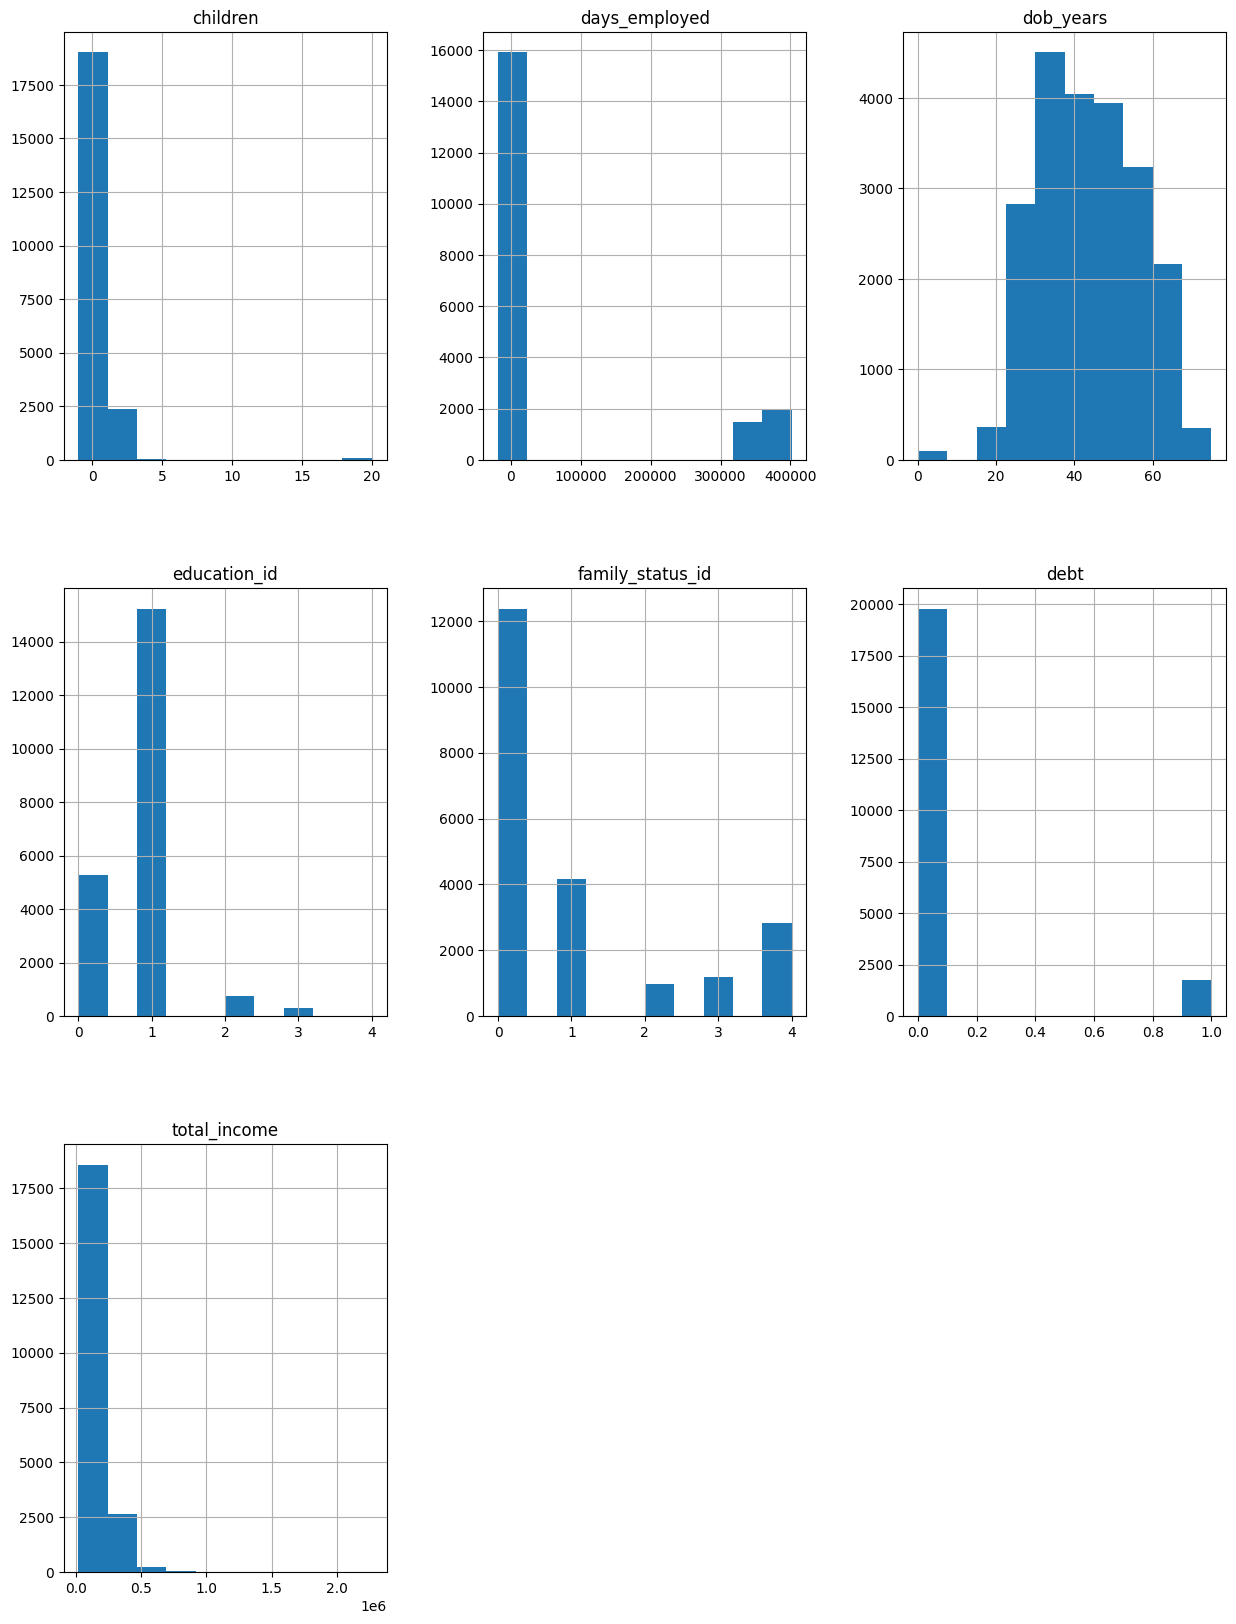

In [192]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 20))
plt.show()

Сразу бросается в глаза: у кого-то очень много детей. В столбце стаж присутствуют отрицательные значения. Есть клиенты в 0 лет.

Проверим столбец "дети" на наличие аномальных значений и выбросов, построив бокс чарты.

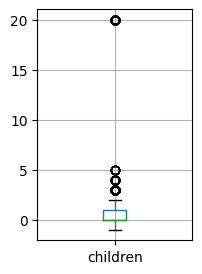

In [193]:
df.boxplot(column=['children'], figsize=(2, 3))
plt.show()

Есть выбросы, а также отрицательные значения. Удалим значения, превышающие 5.

In [194]:
df.drop(df.loc[(df['children'] < 0) | (df['children'] > 6)].index, inplace=True)

In [195]:
print('\nДоля исходных данных: ', df.shape[0]/row_data_shape)


Доля исходных данных:  0.9942857142857143


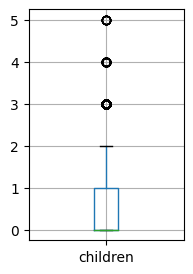

In [196]:
df.boxplot(column=['children'], figsize=(2, 3))
plt.show()

In [197]:
df = df.reset_index()

In [198]:
df = df.drop(labels='index', axis=1)

Теперь надо разобраться со значениями days_employed

Поменяем отрицательные значения на положительные.

In [199]:
filter_negative_days_employed = df['days_employed'] < 0

In [200]:
df_negative_days_employed = df.loc[filter_negative_days_employed] 

In [201]:
df_positive_days_employed = df_negative_days_employed.copy(deep=True)

In [202]:
for i in range(df.shape[0]):
    try:
        df_positive_days_employed.loc[i, 'days_employed'] = df_negative_days_employed.loc[i, 'days_employed'] * -1
    except KeyError:
        continue

Можно ли это сделать встроенными методами pandas? Replace не сработал...

In [203]:
df.loc[filter_negative_days_employed] = df_positive_days_employed

Проверим наличие отрицательных значений:

In [204]:
df['days_employed'].describe()

count     19240.000000
mean      67027.691459
std      139130.846446
min          24.141633
25%         927.984311
50%        2195.251592
75%        5556.372075
max      401755.400475
Name: days_employed, dtype: float64

Таким образом, заменили все отрицательные значения days_employed на положительные.

Теперь удалим строки, в которых возраст клиента 0 лет.

In [205]:
df.drop(df.loc[df['dob_years'] == 0].index, inplace=True)

In [206]:
df = df.reset_index(drop=True)

In [207]:
df['dob_years'].describe()

count    21302.000000
mean        43.503474
std         12.252843
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [208]:
print('\nДоля исходных данных: ', df.shape[0]/row_data_shape)


Доля исходных данных:  0.9896399535423925


#### 4.

Для каждого типа занятости income_type найдем медианное значение стажа days_employed 

In [209]:
filter_empl = df['income_type'] == 'сотрудник'
filter_grand = df['income_type'] == 'пенсионер'
filter_friend = df['income_type'] == 'компаньон'
filter_govern = df['income_type'] == 'госслужащий'
filter_unempl = df['income_type'] == 'безработный'
filter_bus = df['income_type'] == 'предприниматель'
filter_student = df['income_type'] == 'студент'
filter_decr = df['income_type'] == 'в декрете'

In [210]:
df_empl = df.loc[filter_empl]
df_grand = df.loc[filter_grand]
df_friend = df.loc[filter_friend]
df_govern = df.loc[filter_govern]
df_unempl = df.loc[filter_unempl]
df_bus = df.loc[filter_bus]
df_student = df.loc[filter_student]
df_decr = df.loc[filter_decr]

Запишем в переменные значения медиан.

In [211]:
empl_days_med = df_empl['days_employed'].median()
grand_days_med = df_grand['days_employed'].median()
friend_days_med = df_friend['days_employed'].median()
govern_days_med = df_govern['days_employed'].median()
unempl_days_med = df_unempl['days_employed'].median()
bus_days_med = df_bus['days_employed'].median()
student_days_med = df_student['days_employed'].median()
decr_days_med = df_decr['days_employed'].median()
print(f'\nСтаж клиентов:\nСотрудник - {empl_days_med} дней\tПенсионер - {grand_days_med} дней\tКомпаньон - {friend_days_med} дней\nГосслужащий - {govern_days_med} дней\tБезработный - {unempl_days_med} дней\tПредприниматель - {bus_days_med} дней\nСтудент - {student_days_med} дней\tВ декрете - {decr_days_med} дней')


Стаж клиентов:
Сотрудник - 1573.791064067419 дней	Пенсионер - 365269.1004135723 дней	Компаньон - 1556.1506780603813 дней
Госслужащий - 2672.903938918005 дней	Безработный - 366413.65274420456 дней	Предприниматель - 520.8480834953765 дней
Студент - 578.7515535382181 дней	В декрете - 3296.7599620220594 дней


#### Вывод:
У пенсионеров и безработных стаж 1000 лет. После удаления аномально больших значений стажа удалялся большой объем данных (почти 20%). Возможно ошибка в оригинальной таблице. Чтобы учесть эту ошибку, заменим значения для пенсионеров и безработных на -1.

In [212]:
df_grand_zero = df.loc[filter_grand]
df_unempl_zero = df.loc[filter_unempl]

In [213]:
df_grand_zero['days_employed'] = -1
df_unempl_zero['days_employed'] = -1

In [214]:
df.loc[df['income_type']=='пенсионер'] = df_grand_zero
df.loc[df['income_type']=='безработный'] = df_unempl_zero

#### 5.

Найдем уникальные значения столбца children. Некорректные значения были удалены ранее.

In [215]:
df['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

#### 6. 

Заполним пропуски столбца days_employed 

In [216]:
df_empl = df.loc[filter_empl]
df_grand = df.loc[filter_grand]
df_friend = df.loc[filter_friend]
df_govern = df.loc[filter_govern]
df_unempl = df.loc[filter_unempl]
df_bus = df.loc[filter_bus]
df_student = df.loc[filter_student]
df_decr = df.loc[filter_decr]

In [217]:
df_empl['days_employed'] = df_empl['days_employed'].fillna(empl_days_med)
df_grand['days_employed'] = df_grand['days_employed'].fillna(grand_days_med)
df_friend['days_employed'] = df_friend['days_employed'].fillna(friend_days_med)
df_govern['days_employed'] = df_govern['days_employed'].fillna(govern_days_med)
df_unempl['days_employed'] = df_unempl['days_employed'].fillna(unempl_days_med)
df_bus['days_employed'] = df_bus['days_employed'].fillna(bus_days_med)
df_student['days_employed'] = df_student['days_employed'].fillna(student_days_med)
df_decr['days_employed'] = df_decr['days_employed'].fillna(decr_days_med)

In [218]:
df.loc[df['income_type']=='сотрудник'] = df_empl
df.loc[df['income_type']=='пенсионер'] = df_grand
df.loc[df['income_type']=='компаньон'] = df_friend
df.loc[df['income_type']=='госслужащий'] = df_govern
df.loc[df['income_type']=='безработный'] = df_unempl
df.loc[df['income_type']=='предприниматель'] = df_bus
df.loc[df['income_type']=='студент'] = df_student
df.loc[df['income_type']=='в декрете'] = df_decr

Проверим:

In [219]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

#### 7.

Приведем все значения столбца education к нижнему регистру.

In [220]:
df['education'] = df['education'].str.lower()

In [221]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,-1.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [222]:
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Если уровень образования "начальное" соответствует начальной школе, а других вариантов я не вижу, то это явно ошибка, такие люде не могут быть клиентами банка. Удалим эти строчки

In [223]:
df.drop(df.loc[df['education'] == 'начальное'].index, inplace=True)

In [224]:
print('\nДоля исходных данных: ', df.shape[0]/row_data_shape)


Доля исходных данных:  0.9765389082462254


In [225]:
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'ученая степень'],
      dtype=object)

#### 8.

Выведем количество строк дубликатов данных.

In [226]:
print(f'\nКоличество строк-дубликатов данных: {df.duplicated().sum()}')


Количество строк-дубликатов данных: 71


Удалим эти строки.

In [227]:
df.drop(df.loc[df.duplicated()].index, inplace=True)

In [228]:
df = df.reset_index(drop=True)

Проверим:

In [229]:
print(f'\nКоличество строк-дубликатов данных: {df.duplicated().sum()}')


Количество строк-дубликатов данных: 0


In [230]:
print('\nДоля исходных данных: ', df.shape[0]/row_data_shape)


Доля исходных данных:  0.9732404181184668


Создадим столбец total_income_category на основании следующих диапазонов:
* 0 - 30000 = E
* 30001 - 50000 = D
* 50001 - 200000 = C
* 200001 - 1000000 = B
* 1000001 и выше = A


In [231]:
df['total_income_category'] = 'A'

In [232]:
for i in range(df.shape[0]):
    value = ''
    if df.loc[i, 'total_income'] <= 30000:
        value = 'E'
    elif df.loc[i, 'total_income'] > 30000 and df.loc[i, 'total_income'] <= 50000:
        value = 'D'
    elif df.loc[i, 'total_income'] > 50000 and df.loc[i, 'total_income'] <= 200000:
        value = 'C'
    elif df.loc[i, 'total_income'] > 200000 and df.loc[i, 'total_income'] <= 1000000:
        value = 'B'
    elif df.loc[i, 'total_income'] > 1000000:
        value = 'A'
    df.loc[i, 'total_income_category'] = value

In [233]:
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
16359,1,2584.846129,32,высшее,0,женат / замужем,0,F,госслужащий,0,165641.870376,заняться высшим образованием,C
16078,1,1874.350804,32,среднее,1,женат / замужем,0,F,компаньон,0,91785.307739,автомобили,C
19379,0,13702.636708,55,среднее,1,женат / замужем,0,F,сотрудник,0,121931.971838,строительство собственной недвижимости,C
18345,1,1544.761257,46,высшее,0,в разводе,3,F,компаньон,0,128039.303833,образование,C
17630,1,-1.000000,67,среднее,1,женат / замужем,0,F,пенсионер,0,93093.261296,покупка жилья для сдачи,C
6287,0,-1.000000,53,среднее,1,женат / замужем,0,F,пенсионер,0,276389.736167,заняться высшим образованием,B
20131,0,2303.811188,25,высшее,0,Не женат / не замужем,4,M,сотрудник,1,273216.758912,заняться образованием,B
5421,0,-1.000000,60,среднее,1,женат / замужем,0,F,пенсионер,0,90649.637787,сделка с автомобилем,C
16735,0,3384.526917,39,среднее,1,гражданский брак,1,F,сотрудник,1,138947.522758,свадьба,C
12117,0,1573.791064,25,среднее,1,гражданский брак,1,M,сотрудник,0,142594.396847,ремонт жилью,C


#### 9.

Разобьем уникальные цели взятия кредита на категории:
* операции с автомобилем
* операции с недвижимостью
* проведение свадьбы
* получение образования

Найдем уникальные значения столбца purpose:

In [234]:
uniq_pur = df['purpose'].unique()

In [235]:
print(uniq_pur)

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'операции со своей недвижимостью'
 'автомобили' 'заняться образованием' 'сделка с подержанным автомобилем'
 'получение образования' 'автомобиль' 'свадьба'
 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование' 'жилье'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Соберем 4 листа с уникальными значениями по категориям. Будем использовать ключевые слова (можно ли это сделать эффективнее?)

In [236]:
car_pur = []
prop_pur = []
wed_pur = []
educ_pur = []

In [237]:
for i in uniq_pur:
    if 'автомобил' in i:
        car_pur.append(i)
    elif 'жиль' in i or 'недвижим' in i:
        prop_pur.append(i)
    elif 'свадь' in i:
        wed_pur.append(i)
    elif 'образов' in i:
        educ_pur.append(i)

In [238]:
len(uniq_pur) == len(car_pur) + len(prop_pur) + len(wed_pur) + len(educ_pur)

True

Создадим новый столбец в таблице и заполним его значениями.

In [239]:
df['purpose_category'] = 'A'

In [240]:
for i in range(df.shape[0]):
    if df['purpose'][i] in car_pur:
        df.loc[i, 'purpose_category'] = 'операции с автомобилем'
    elif df['purpose'][i] in prop_pur:
        df.loc[i, 'purpose_category'] = 'операции с недвижимостью'
    elif df['purpose'][i] in wed_pur:
        df.loc[i, 'purpose_category'] = 'проведение свадьбы'
    elif df['purpose'][i] in educ_pur:
        df.loc[i, 'purpose_category'] = 'получение образования'

In [241]:
df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
10568,0,2124.946354,27,высшее,0,женат / замужем,0,M,сотрудник,0,179652.712804,покупка жилья для семьи,C,операции с недвижимостью
5270,0,-1.000000,58,среднее,1,женат / замужем,0,F,пенсионер,0,111492.182791,жилье,C,операции с недвижимостью
10496,2,88.813603,31,среднее,1,женат / замужем,0,M,сотрудник,0,229730.875703,автомобиль,B,операции с автомобилем
5771,0,3252.664084,48,среднее,1,женат / замужем,0,F,госслужащий,1,266925.821698,операции с недвижимостью,B,операции с недвижимостью
11648,1,2972.469162,55,среднее,1,женат / замужем,0,F,сотрудник,0,102023.942163,покупка жилой недвижимости,C,операции с недвижимостью


### Шаг 3. Исследовательский анализ и визуализация

Для анализа зависимостей параметров будем пользоваться методами визуализации: графики, таблицы, а также функция df['A'].corr('B'). Корреляция (по Пирсону) считается:
* слабой (< 0.3)
* средней (0.3 - 0.7)
* сильной (> 0.7)

#### 1.

Проверим, есть ли зависимость между количеством детей и уровнем дохода.

In [242]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,-1.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы


<AxesSubplot:xlabel='children'>

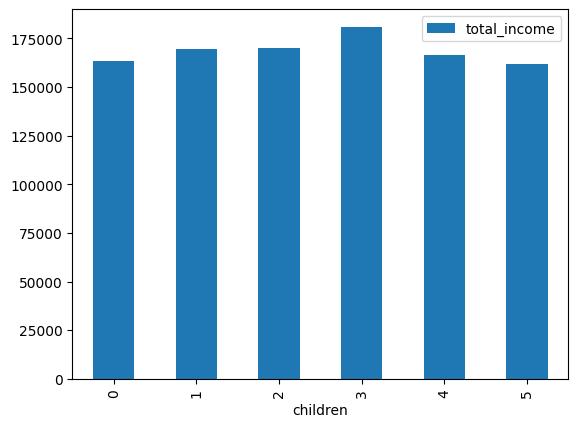

In [243]:
pd.pivot_table(df, 
              index='children',
              values='total_income',
              aggfunc='mean').plot.bar()

Часть кода для проверки.

In [244]:
count = 0
income = 0
for i in range(df.shape[0]):
    if df.loc[i, 'children'] == 0:
        income += df.loc[i, 'total_income']
        count += 1
print(f'Mean value for 0 children: {income/count}')

Mean value for 0 children: 163540.9750983924


<AxesSubplot:xlabel='children'>

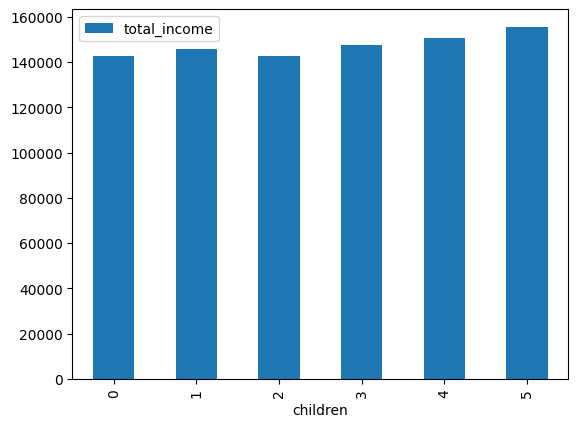

In [245]:
pd.pivot_table(df, 
              index='children',
              values='total_income',
              aggfunc='median').plot.bar()

Среднее и медианное значения общего дохода очень слабо зависят от количества детей в семье.

<AxesSubplot:xlabel='children'>

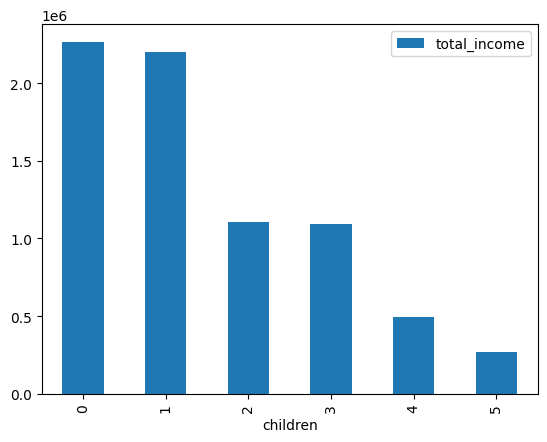

In [246]:
pd.pivot_table(df, 
              index='children',
              values='total_income',
              aggfunc='max').plot.bar()

<AxesSubplot:xlabel='children'>

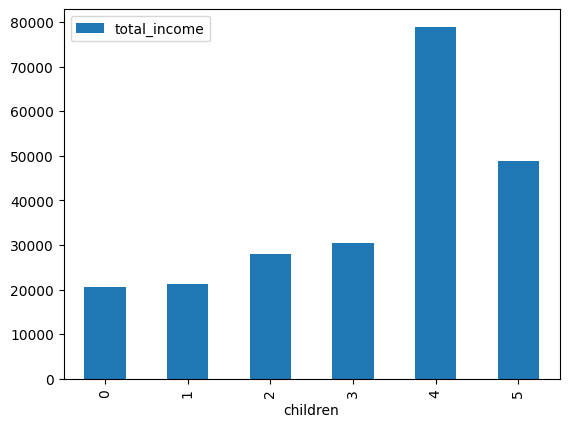

In [247]:
pd.pivot_table(df, 
              index='children',
              values='total_income',
              aggfunc='min').plot.bar()

Анализ минимального и максимального значений дохода показывает, что максимальный заработок больше в семьях без детей или 1 ребенком. Для 2-3 детей это значение падает, для 4 и 5 - еще сильнее падает. При этом минимальный заработок выше у семей с большим количеством детей. Это может быть связано с дополнительными выплатами от государства для многодетных семей.

#### 2.

Рассмотрим количество детей и возврат кредита в срок (1 в debt соответствует тому, что задолженность была).

Создадим сводную таблицу. Добавим в нее следующие столбцы: количество детей, всего кредитополучателей, всего должников, доля должников.

Создадим новую таблицу с интересующими нас столбцами.

In [248]:
df_children = pd.DataFrame()

In [249]:
df_children = df[['children', 'debt']]

In [250]:
df_children.head()

,children,debt
0,1,0
1,1,0
2,0,0
3,3,0
4,0,0


Всего кредитополучателей с определенным количеством детей:

In [251]:
df_people = df_children.groupby(by=['children']).size().reset_index().set_index('children')

In [252]:
df_people.columns = ['people']

In [253]:
df_people

,people
children,
0,13833
1,4732
2,2014
3,321
4,41
5,8


Количество кредитополучателей с определенным количеством детей и долгом:

In [254]:
df_people_debt = df_children.groupby(by=['children']).sum()

In [255]:
df_people_debt

,debt
children,
0,1043
1,431
2,188
3,27
4,4
5,0


Соберем все в одну таблицу

In [256]:
df_children_debt = pd.concat([
    df_people,
    df_people_debt
], axis=1)

In [257]:
df_children_debt

,people,debt
children,,
0,13833,1043
1,4732,431
2,2014,188
3,321,27
4,41,4
5,8,0


Посчитаем долю должников:

In [258]:
df_children_debt['debt_perc'] = df_children_debt['debt'] / df_children_debt['people'] * 100

In [259]:
df_children_debt = df_children_debt.round(2)
df_children_debt

,people,debt,debt_perc
children,,,
0,13833,1043,7.54
1,4732,431,9.11
2,2014,188,9.33
3,321,27,8.41
4,41,4,9.76
5,8,0,0.00


Введем категории пол количеству детей:
* бездетные A
* малодетные (1-2) B
* многодетные C

In [260]:
df_children_debt['children_category'] = 'B'

In [261]:
for i in range(6):
    if i == 0:
        df_children_debt.loc[i, "children_category"] = 'A'
    if i > 2:
        df_children_debt.loc[i, "children_category"] = 'C'

In [262]:
df_children_debt

,people,debt,debt_perc,children_category
children,,,,
0,13833,1043,7.54,A
1,4732,431,9.11,B
2,2014,188,9.33,B
3,321,27,8.41,C
4,41,4,9.76,C
5,8,0,0.00,C


Для каждой категории посчитаем процент должников.

In [263]:
debt_A = df_children_debt.loc[0, 'debt_perc']
debt_B = 100 * (df_children_debt.loc[1, 'debt'] + df_children_debt.loc[2, 'debt']) / (df_children_debt.loc[1, 'people'] + df_children_debt.loc[2, 'people'])
debt_C = 100 * (df_children_debt.loc[3, 'debt'] + df_children_debt.loc[4, 'debt'] + df_children_debt.loc[5, 'debt']) / (df_children_debt.loc[3, 'people'] + df_children_debt.loc[4, 'people'] + df_children_debt.loc[5, 'people'])

In [264]:
print(f'\nПроцент должников среди семей без детей (категория А): {debt_A}\nПроцент должников сред семей категории B: {debt_B}\nПроцент должников сред семей категории C: {debt_C}')


Процент должников среди семей без детей (категория А): 7.54
Процент должников сред семей категории B: 9.17580788615476
Процент должников сред семей категории C: 8.378378378378379


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

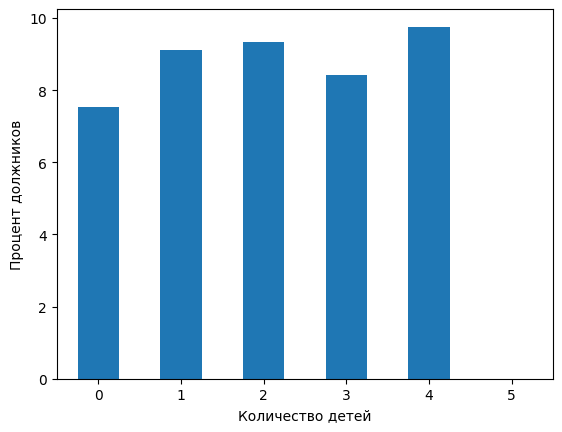

In [265]:
df_children_debt['debt_perc'].plot.bar(xlabel='Количество детей', ylabel='Процент должников')
plt.xticks(rotation=0)

Зависимости между количеством детей в семье и фактом наличия задолженности не наблюдается. Процент должников крайне мал в каждом из случаев (для семей с 5 детьми их нет, но таких семей в принципе мало). Разбитие по категориям также не показало наличие зависимости.

#### 3.

Рассмотрим теперь, есть ли зависимость между семейным положением и возвратом кредита в срок.

In [266]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,-1.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы


Вспомним, какие в таблице есть семейные положения.

In [267]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Составим сводную таблицу:

In [268]:
df_status_debt = pd.pivot_table(df,
              index='family_status',
              values='debt',
              aggfunc='sum')

In [269]:
df_status_debt

,debt
family_status,
Не женат / не замужем,269
в разводе,82
вдовец / вдова,62
гражданский брак,372
женат / замужем,908


На первый взгляд, среди людей в браке явно большое количество должников. Надо проверить не количество, а процент:

In [270]:
df_people_status = df.groupby(by=['family_status']).size().reset_index().set_index('family_status')
df_people_status.columns = ['people']
df_people_status

,people
family_status,
Не женат / не замужем,2746
в разводе,1159
вдовец / вдова,915
гражданский брак,4057
женат / замужем,12072


In [271]:
df_status = pd.concat([
    df_people_status,
    df_status_debt
], axis=1)
df_status.head()

,people,debt
family_status,,
Не женат / не замужем,2746,269
в разводе,1159,82
вдовец / вдова,915,62
гражданский брак,4057,372
женат / замужем,12072,908


In [272]:
df_status['debt_perc'] = df_status['debt'] / df_status['people'] * 100
df_status = df_status.round(2)
df_status

,people,debt,debt_perc
family_status,,,
Не женат / не замужем,2746,269,9.80
в разводе,1159,82,7.08
вдовец / вдова,915,62,6.78
гражданский брак,4057,372,9.17
женат / замужем,12072,908,7.52


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Не женат / не замужем'),
  Text(1, 0, 'в разводе'),
  Text(2, 0, 'вдовец / вдова'),
  Text(3, 0, 'гражданский брак'),
  Text(4, 0, 'женат / замужем')])

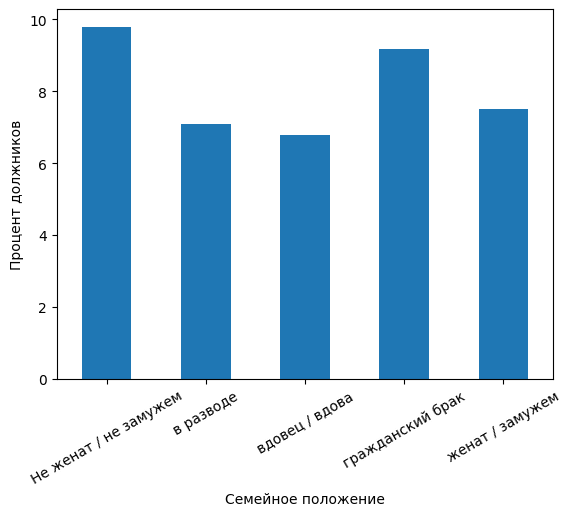

In [317]:
df_status['debt_perc'].plot.bar(xlabel='Семейное положение', ylabel='Процент должников')
plt.xticks(rotation=30)

Доля должников среди людей с разным семейным положением почти одинаковая.

#### 4.

Рассмотрим, есть ли зависимость между уровнем дохода и возвратом кредита.

In [274]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,-1.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы


Посчитаю ради интереса средний заработок по категориям:

In [275]:
pd.pivot_table(df,
              values='total_income',
               columns='total_income_category',
              aggfunc='mean')

total_income_category,A,B,C,D,E
total_income,1.339118e+06,287086.516655,128350.530663,42974.252491,25818.571078


Воспользуемся введенными раньше категориями дохода и составим таблицу:

In [276]:
df_inc_cat_people = df.groupby(by=['total_income_category']).size().reset_index().set_index('total_income_category')
df_inc_cat_people.columns = ['people']

In [277]:
df_inc_cat_debt = pd.pivot_table(df,
                                index='total_income_category',
                                values='debt',
                                aggfunc='sum')

In [278]:
df_inc_cat = pd.concat([
    df_inc_cat_people,
    df_inc_cat_debt
], axis=1)

In [279]:
df_inc_cat['debt_perc'] = df_inc_cat['debt'] / df_inc_cat['people'] *100

In [280]:
df_inc_cat = df_inc_cat.round(2)
df_inc_cat

,people,debt,debt_perc
total_income_category,,,
A,25,2,8.00
B,4948,349,7.05
C,15622,1319,8.44
D,333,21,6.31
E,21,2,9.52


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

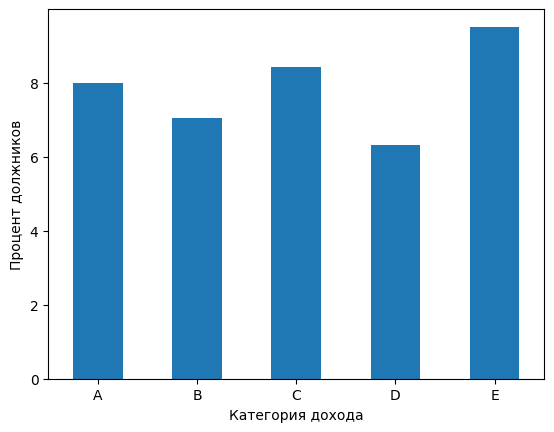

In [320]:
df_inc_cat['debt_perc'].plot.bar(xlabel='Категория дохода', ylabel='Процент должников')
plt.xticks(rotation=0)

Среди людей с наименьшим доходом количество должников чуть больше, но эта разница незначительна. 

#### 5.

Рассмотрим, есть ли зависимость между уровнем образования и уровнем дохода, а также уровнем образования и возвратом кредита в срок.

In [282]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,-1.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы


Для начала узнаем, какой id какому образованию соответствует:

In [283]:
for i in df['education'].unique():
    education_id_mean = int(df.loc[df['education'] == i, 'education_id'].mean())
    print(f'Уровень образования "{i}" соответствует id {education_id_mean}')

Уровень образования "высшее" соответствует id 0
Уровень образования "среднее" соответствует id 1
Уровень образования "неоконченное высшее" соответствует id 2
Уровень образования "ученая степень" соответствует id 4


(array([0, 1, 2, 3]),
 [Text(0, 0, 'высшее'),
  Text(1, 0, 'неоконченное высшее'),
  Text(2, 0, 'среднее'),
  Text(3, 0, 'ученая степень')])

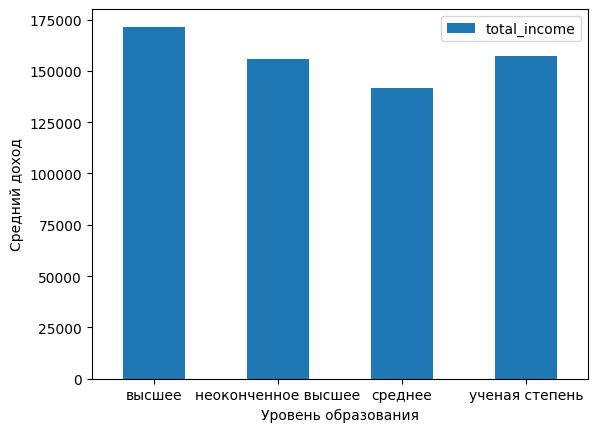

In [284]:
pd.pivot_table(df,
              index='education',
              values='total_income',
              aggfunc='median').plot.bar(xlabel='Уровень образования', ylabel='Средний доход')
plt.xticks(rotation=0)

Средний доход выше всего у людей с высшим образованием, ниже - у людей со средним. Однако, разница небольшая. Посчитаем, сколько в процентах людей с различными уровнями образования обладают доходом A, B, C, D и E категорий.

Построим сводную таблицу с количеством людей с определенным образованием и уровнем дохода. Для начала делаем копию датафрейма с интересующими нас столбцами.

In [285]:
df_education_income = df[['education', 'total_income_category']].copy()

In [286]:
df_education_income['freq'] = 1

In [287]:
df_education_income = df_education_income.pivot_table(index='education', columns='total_income_category', values='freq', aggfunc='count')

In [288]:
df_education_income

total_income_category,A,B,C,D,E
education,,,,,
высшее,18.0,1840.0,3303.0,31.0,NaN
неоконченное высшее,NaN,216.0,520.0,3.0,NaN
среднее,7.0,2890.0,11795.0,299.0,21.0
ученая степень,NaN,2.0,4.0,NaN,NaN


Количество людей с определенным уровнем образования:

In [289]:
df.groupby(by='education').size()

education
высшее                  5192
неоконченное высшее      739
среднее                15012
ученая степень             6
dtype: int64

Тогда в процентах:

In [290]:
for i in df_education_income.index:
    for j in df_education_income.columns:
        df_education_income.loc[i, j] = df_education_income.loc[i, j] / df.groupby(by='education').size()[i]
        df_education_income.loc[i, j] *= 100
df_education_income = df_education_income.fillna(0)
df_education_income = df_education_income.round(2)

In [291]:
df_education_income

total_income_category,A,B,C,D,E
education,,,,,
высшее,0.35,35.44,63.62,0.60,0.00
неоконченное высшее,0.00,29.23,70.37,0.41,0.00
среднее,0.05,19.25,78.57,1.99,0.14
ученая степень,0.00,33.33,66.67,0.00,0.00


Разница небольшая. Среди людей с высшим образованием и ученой степенью процент более обеспеченных чуть больше. Люди со средним образованием и без образования в основном представляют средний класс.

Рассмотрим теперь возврат кредита в срок.

In [292]:
df_education_debt = df[['education', 'debt']].copy()
df_education_debt['freq'] = 1
df_education_debt = df_education_debt.pivot_table(index='education', columns='debt', values='freq', aggfunc='count')


In [293]:
for i in df_education_debt.index:
    for j in df_education_debt.columns:
        df_education_debt.loc[i, j] = df_education_debt.loc[i, j] / df.groupby(by='education').size()[i]
        df_education_debt.loc[i, j] *= 100
df_education_debt = df_education_debt.fillna(0)
df_education_debt = df_education_debt.round(2)

In [294]:
df_education_debt

debt,0,1
education,,
высшее,94.66,5.34
неоконченное высшее,90.80,9.20
среднее,91.02,8.98
ученая степень,100.00,0.00


Данные в таблице показывают, что среди людей с неоконченным высшим образованием и средним процент должников больше. Такие люди с большей вероятностью окажутся в долгу.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'высшее'),
  Text(1, 0, 'неоконченное высшее'),
  Text(2, 0, 'среднее'),
  Text(3, 0, 'ученая степень')])

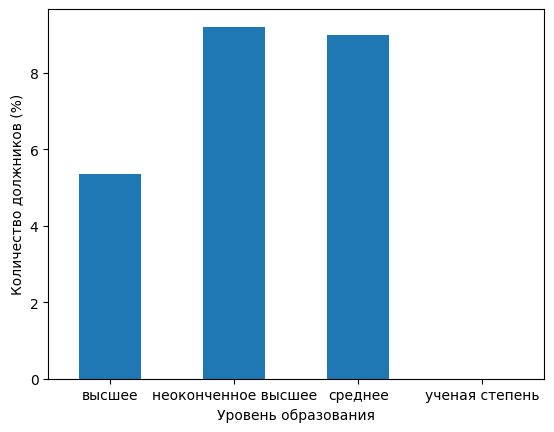

In [295]:
df_education_debt[1].plot.bar(xlabel='Уровень образования', ylabel='Количество должников (%)')
plt.xticks(rotation=0)

#### 6.

Оценим возвратность кредитов для разных целей по категориям.

In [296]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,-1.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы


In [297]:
df_pur_debt = df[['purpose_category','debt']].copy()
df_pur_debt['freq'] = 1
df_pur_debt = df_pur_debt.pivot_table(index='purpose_category', columns='debt', values='freq', aggfunc='count')

In [298]:
df_pur_debt

debt,0,1
purpose_category,,
операции с автомобилем,3812,391
операции с недвижимостью,9799,761
получение образования,3551,364
проведение свадьбы,2094,177


In [299]:
frame = {'purpose_category': df_pur_debt.index,
        'debt':df_pur_debt[1]}

In [300]:
df_pur_debt = pd.DataFrame(frame)
df_pur_debt = df_pur_debt.drop('purpose_category', axis=1)

In [301]:
df_pur_debt = df_pur_debt.astype(float)

In [302]:
for i in df_pur_debt.index:
    df_pur_debt.loc[i, 'debt'] = df_pur_debt.loc[i, 'debt'] * 100 / len(df.loc[df['purpose_category'] == i])
df_pur_debt = df_pur_debt.round(2)
df_pur_debt

,debt
purpose_category,
операции с автомобилем,9.30
операции с недвижимостью,7.21
получение образования,9.30
проведение свадьбы,7.79


(array([0, 1, 2, 3]),
 [Text(0, 0, 'операции с автомобилем'),
  Text(1, 0, 'операции с недвижимостью'),
  Text(2, 0, 'получение образования'),
  Text(3, 0, 'проведение свадьбы')])

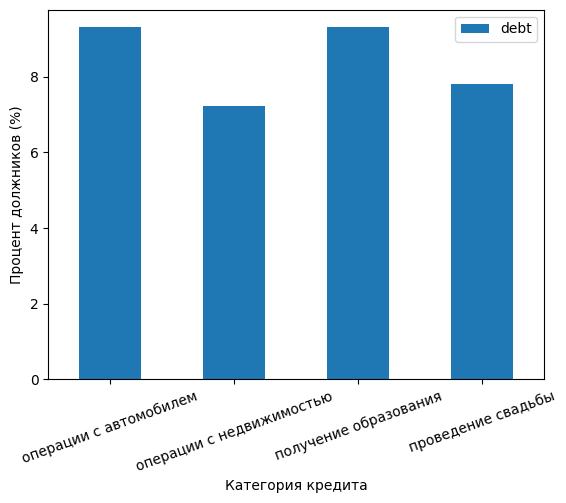

In [303]:
df_pur_debt.plot.bar(xlabel='Категория кредита', ylabel='Процент должников (%)')
plt.xticks(rotation=20)

Наибольший процент должников среди людей, берущих кредит на автомобиль и получение образования.

#### Extra 

Проверим, есть ли зависимость между возрастом клиентов и возвратом долга:

In [304]:
df['dob_years'].describe()

count    20949.000000
mean        43.425128
std         12.221696
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Введем категории возрастов:
* "A" (<31);
* "B" (30< и <46);
* "C" (45< и <61);
* "D" (>60);

In [305]:
df['dob_years_category'] = 'A'

In [306]:
for i in range(df.shape[0]):
    if (df.loc[i, 'dob_years'] > 30) & (df.loc[i, 'dob_years'] < 46):
        df.loc[i, 'dob_years_category'] = 'B'
    elif (df.loc[i, 'dob_years'] > 45) & (df.loc[i, 'dob_years'] < 61):
        df.loc[i, 'dob_years_category'] = 'C'
    elif df.loc[i, 'dob_years'] > 60:
        df.loc[i, 'dob_years_category'] = 'D'

In [307]:
df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,dob_years_category
2324,0,927.609926,50,среднее,1,вдовец / вдова,2,F,сотрудник,0,79227.004997,операции с коммерческой недвижимостью,C,операции с недвижимостью,C
9743,2,3961.983767,28,высшее,0,гражданский брак,1,F,компаньон,0,293616.668594,заняться образованием,B,получение образования,A
1304,0,-1.000000,59,среднее,1,вдовец / вдова,2,F,пенсионер,0,118514.486412,на покупку автомобиля,C,операции с автомобилем,C
9251,3,5931.626784,34,среднее,1,женат / замужем,0,F,сотрудник,0,175210.494517,дополнительное образование,C,получение образования,B
4782,0,1940.165853,62,среднее,1,гражданский брак,1,F,сотрудник,0,166343.028736,покупка недвижимости,C,операции с недвижимостью,D


In [308]:
df_dob_years = df[['dob_years_category', 'debt']].copy()

In [309]:
df_dob_years['freq'] = 1
df_dob_years = df_dob_years.pivot_table(index='dob_years_category', columns='debt', values='freq', aggfunc='count')

In [310]:
df_dob_years[['debt_perc']] = 1.0

In [311]:
for i in df_dob_years.index:
    df_dob_years.loc[i, 'debt_perc'] = 100 * df_dob_years.loc[i, 1] / (df_dob_years.loc[i, 0] + df_dob_years.loc[i, 1])
df_dob_years[['debt_perc']] = df_dob_years[['debt_perc']].round(2)

In [312]:
df_dob_years

debt,0,1,debt_perc
dob_years_category,,,
A,3271,398,10.85
B,7587,736,8.84
C,6442,461,6.68
D,1956,98,4.77


(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C'), Text(3, 0, 'D')])

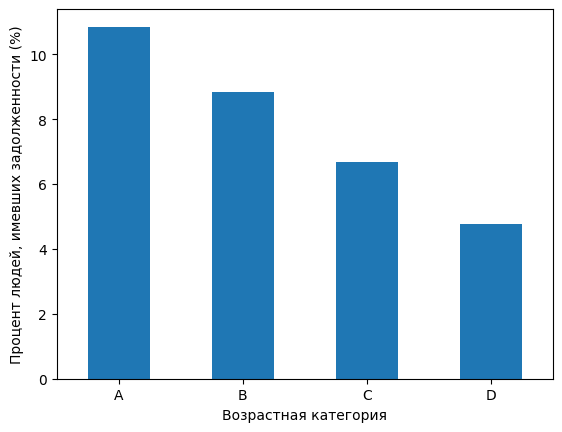

In [313]:
df_dob_years['debt_perc'].plot.bar(xlabel='Возрастная категория', ylabel='Процент людей, имевших задолженности (%)')
plt.xticks(rotation=0)

Очевидно, что чем старше клиент, тем с большей вероятностью он вернет кредит. Это связано со стабильностью в работе и жизни в целом, молодые люди часто учатся, не имеют постоянного заработка и т. д.

#### 7. 

Вывод по составу таблицы и данным:

В ходе проделанной работы были выявлены различные аномалии, а также пропуски в таблице. Среди них:
* в столбце с общим доходом клиентов присутствовали пустые строки. Они были заполнены медианными значениями по каждой из категорий столбца income_type;
* в столбце количество детей были замечены аномально большие и отрицательные значения. Эти данные были удалены, так как они составляли меньше 1% от общего количества;
* информация о стаже клиентов для пенсионеров и безработных полностью состоит из аномальных значений. Сначала отрицательные значения были заменены положительными, однако позднее было замечено, что данные неадекватные - 1000 лет стажа. Так как количесвто строк большое, значения были заменены на -1, соответствующую ошибке;
* в столбце с возрастом клиентов присутствовали значения 0, что невозможно. Эти данные были удалены, так как составляли менее 1% от общего объема;
* в столбце со стажем присутствовали пропуски, которые были заполнены медианными значениями по категориям столбца income_type;
* в столбце с уровнем образования данные были записаны с разным форматированием (регистром букв), они были приведены к общему виду. Также там присутствовало значение "начальный", этот уровень образования соответствует школьникам, а они не могут быть клиентами банка. Данные удалены;
* после всех преобразований в таблице все еще имелись строки дубликаты (явные), они были удалены;
* для удобства были введены категории для общего дохода и цели кредита.

Следующие <b>рекомендации</b> предложены для избежания аномалий в будущем: 
* поля общий доход и стаж сделать обязательными для заполнения;
* отрицательные и большие (20) значения количества детей могут быть связаны с опечатками во время ввода (поставили знак "минус", случайно нажали на ноль). Стоит реализовать проверку на отрицательные числа, а также аномально большие (например, больше 10, задавать уточняющий вопрос);
* Аномальные значения для стажа безработных и пенсионеров могут быть обусловлены ошибкой в обработке данных. Стоит проверить часть кода, обрабатывающую именно эти категории клиентов;
* Нулевые значения в возрасте, как и в случае с количеством детей, могут быть связаны с опечатками пользователей, следует реализовать проверку на ввод корректных значений (>18);
* запись уровня образования можно реализовать через выбор доступных вариантов, тогда не будет проблемы с разным форматированием записей, и не будет аномальных значений типа "начальное";
* следует делать проверку новых данных на наличие подобных в базе (на дубликаты), для корректности такой проверки необходимо задать каждому клиенту уникальный номер (ID), чтобы исключить ошибки в случае полного совпадения данных двух разных людей.

### <b>Выводы и рекомендации по выдаче кредитов:</b>

В ходе ииследования были рассмотрены следующие зависимости:
* количество детей и уровень дохода;
* количество детей и возврат кредита в срок;
* семейное положение и возврат кредита в срок;
* уровень дохода и возврат кредита в срок;
* уровень образования и уровень дохода;
* уровень образования и возврат кредита в срок;
* возвратность кредитов, взятых для разных целей по категориям;
* возраст клиентов и возврат кредита в срок.

<i>Количество детей:</i>
<br/>Количество детей в семье практически не влияет на средний заработок семьи. Однако, чем меньше детей в семье, тем выше максимальный возможный заработок. Количество детей также не влияет на факт задолженности. Из этого следует, что вводить ограничения на выдачу кредита по количеству детей нет смысла, но большие суммы стоит доверять именно семьям, где не более 2 детей.

<i>Семейное положение:</i>
<br/>Стоит уделять внимание на людей, никогда не состоявших в браке, либо находящихся в статусе гражданского брака. Среди них процент задолженности долга <u>немного</u> выше. Возможно привлечение клиентов, находящихся в браке, для выдачи б<b>о</b>льшего количества кредитов путем маркетинговых компаний, призыва взять кредит на семью.

<i>Уровень дохода:</i>
<br/>Люди с наименьшим уровнем дохода, чаще оказываются в ситуации задолженности банку, стоит внимательнее изучить их дела перед одобрением выдачи кредита. Не стоит выдавать им большие суммы.

<i>Уровень образования:</i>
<br/>Люди со средним образованием обладают наименьшим средним доходом. При этом процент должников среди людей со средним или неоконченным высшим образованием почти в два раза выше, относительно остальных категорий. Следовательно, людям со средним образованием стоит внимательнее давать кредит и воздержаться от операций с крупными суммами. Также возможно привлечение людей с высшим образованием или степенью путем маркетинговых компаний/льготных периодов.

<i>Категории кредита:</i>
<br/>Люди, берущие кредит на операции с автомобилем или получение образования чаще всего оказываются в долгах. Возможно, следует понизить ставку, либо ввести льготные периоды на эти категории. В случае получения образования возраст клиентов, скорее всего, будет скорее молодым. Таким образом, молодым людям можно предлагать дополнительные льготы на получение образования, чтобы повысить вероятность возвращения кредита.

<i>Возраст клиентов:</i>
<br/>Молодые клиенты чаще оказываются должниками. Как уже было указано ранее, стоит ввести льготные периоды/ставки для такой категории клиентов, чтобы повысить вероятность возврата кредита.

скидывать через github либо google colab
